# Twitter_Streaming

In [2]:
from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from pyspark.sql import SQLContext
from pyspark.sql.functions import desc

In [4]:
conf = SparkConf().setAppName('twitterApp').setMaster('local[2]')
sc = SparkContext(conf=conf)
ssc = StreamingContext(sc, 10)
sqlContext = SQLContext(sc)

In [5]:
socket_stream = ssc.socketTextStream("127.0.0.1", 5555)

In [6]:
lines = socket_stream.window( 150 )

In [7]:
from collections import namedtuple
fields = ("tag", "count" )
Tweet = namedtuple( 'Tweet', fields )

In [8]:
( lines.flatMap( lambda text: text.split( " " ) ) 
             .filter( lambda word: word.lower().startswith("#") ) 
             .map( lambda word: ( word.lower(), 1 ) ) 
             .reduceByKey( lambda a, b: a + b ) 
             .map( lambda rec: Tweet( rec[0], rec[1] ) ) 
             ##.foreachRDD( lambda rdd: rdd.toDF().sort( desc("count") # the desc here doesnt work with 
             .foreachRDD( lambda rdd: rdd.toDF().sort(desc("count"))      
             .limit(10).registerTempTable("tweets") ) )
#              .registerTempTable("tweets") ) )

# Run the Streaming.py file

In [9]:
import time
from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns
import pandas
# Only works for Jupyter Notebooks!
%matplotlib inline

In [10]:
ssc.start()

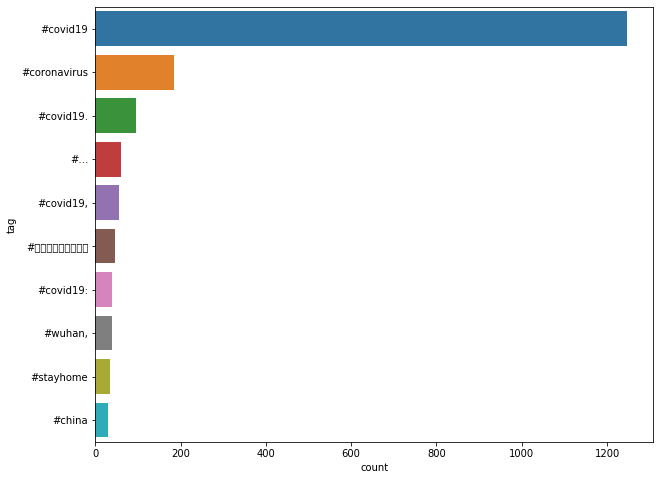

In [11]:
start = time.time()
count = 0
while count < 10:
    
    time.sleep( 3 )
    top_10_tweets = sqlContext.sql( 'Select tag, count from tweets' )
#     top_tweets = sqlContext.sql( 'Select tag, count from tweets' )
    top_10_df = top_10_tweets.toPandas()
#     top_df = top_tweets.toPandas()
    display.clear_output(wait=True)
    plt.figure( figsize = ( 10, 8 ) )
    sns.barplot( x="count", y="tag", data=top_10_df)
    plt.show()
    count = count + 1


In [12]:
print(f'Time: {time.time() - start}')

Time: 100.00922989845276


In [13]:
top_10_tweets = sqlContext.sql( 'Select tag, count from tweets' )
top_10_tweets.show()

+-------------------+-----+
|                tag|count|
+-------------------+-----+
|           #covid19| 1276|
|       #coronavirus|  192|
|          #covid19.|   89|
|                 #…|   64|
|#新型コロナウイルス|   50|
|          #covid19,|   45|
|            #wuhan,|   42|
|          #stayhome|   38|
|          #covid19:|   37|
|             #china|   30|
+-------------------+-----+



In [ ]:
ssc.stop(stopSparkContext=True, stopGraceFully=True)


In [3]:
sc.stop()